Index(['Survey Metadata - Start Date (+00:00 GMT)',
       'Survey Metadata - End Date (+00:00 GMT)',
       'Survey Metadata - Response Type', 'Survey Metadata - IP Address',
       'Survey Metadata - Progress', 'Survey Metadata - Duration (in seconds)',
       'Survey Metadata - Finished',
       'Survey Metadata - Recorded Date (+00:00 GMT)',
       'Contact Fields - Recipient Last Name',
       'Contact Fields - Recipient First Name',
       'Contact Fields - Recipient Email',
       'Contact Fields - External Reference',
       'Survey Metadata - Location Latitude',
       'Survey Metadata - Location Longitude',
       'Contact Fields - Distribution Channel',
       'Survey Metadata - User Language', 'Embedded Data - Q_RecaptchaScore',
       'Q1_Browser - Browser', 'Q1_Version - Version',
       'Q1_Operating System - Operating System', 'Q1_Resolution - Resolution',
       'Q3 - We already have some council provided community technology in place. Which...',
       'Q4 - What tech

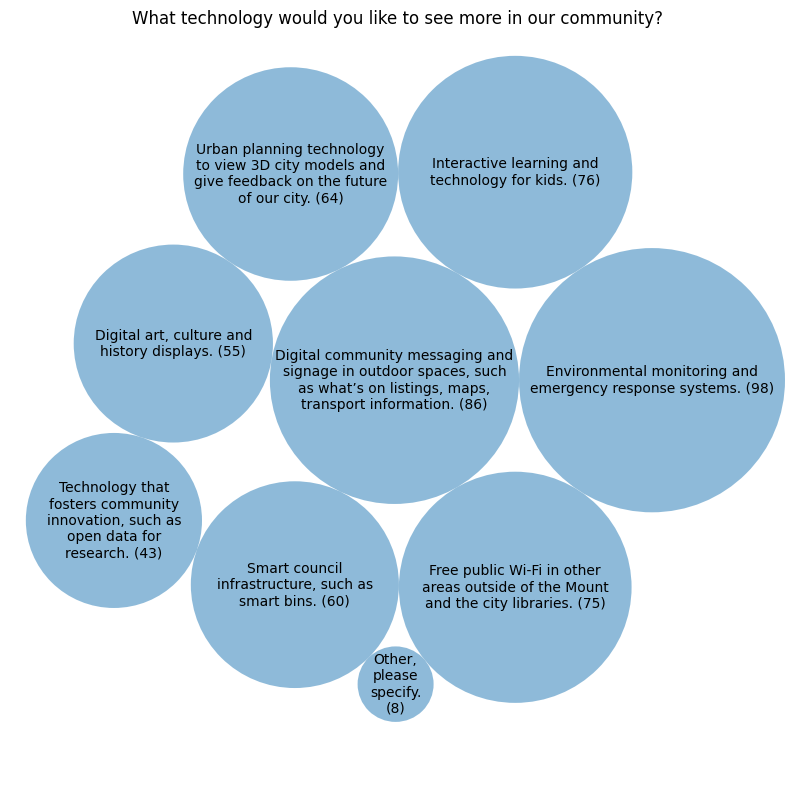

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import circlify
import textwrap  # Importing textwrap module for word wrapping
import spacy

# Load spaCy's English model
nlp = spacy.load('en_core_web_sm')

# Read the CSV file
df = pd.read_csv('data/dashboard-export-11-57-pm-2024-11-21.csv')  # Replace with the actual path to survey CSV file export
print(df.columns)
# Extract the relevant column
column_name = 'Q4 - What technology would you like to see more of in our community? *\n\nPlease t...'
technologies = df[column_name].str.replace('Other, please specify.,', '', regex=False)

print(technologies)

# Split the column into individual entries (if it's a comma-separated string)
technologies_split = technologies.str.split(' ,').explode().str.strip()

# Function to process and simplify each technology entry
def simplify_text(text):
    # Process the text using spaCy
    doc = nlp(text)

    # Keep original words that are not stop words, not punctuation, and have more than 1 character
    simplified_tokens = [token.text for token in doc if not token.is_stop and not token.is_punct and len(token.text) > 1]

    # Return the simplified sentence (joined back together)
    return " ".join(simplified_tokens)

# Apply the simplification function to each entry in the column
simplified_technologies = technologies_split.apply(simplify_text)

# Count the occurrences of each unique entry
technology_counts = technologies_split.value_counts()

# print(technology_counts)

# Compute circle positions
circles = circlify.circlify(
    technology_counts.tolist(),
    show_enclosure=False,
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

# Reverse the order of the circles to match the order of data
circles = circles[::-1]

# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(10, 10))

# Title
ax.set_title('What technology would you like to see more in our community?')

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# List of labels (should correspond to unique values, not the original `df` column)
labels = technology_counts.index

# Print circles with labels
for circle, label, count in zip(circles, labels, technology_counts):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.5, linewidth=2))

    # Dynamically set the wrap width based on the circle's radius (2 * r)
    wrap_width = int(2 * r * 50)  # Adjust the factor (here 10) to match text length better
    if wrap_width == 0:
        wrap_width = 10
    # Wrap the label text based on the circle's width
    wrapped_label = textwrap.fill(f"{label}\n({count})", width=wrap_width)

    # Annotate the circle with the wrapped label
    plt.annotate(
        wrapped_label,
        (x, y),
        va='center',
        ha='center',
        fontsize=10,  # Adjust font size as needed
        color='black'
    )

# Show the plot
plt.show()
